In [4]:
import io
from IPython.nbformat import current
def execute_notebook(nbfile):
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    ip = get_ipython()
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("../../../bin/imports.ipynb")

Populating the interactive namespace from numpy and matplotlib


## Run scripts on cluster

In [14]:
def create_cluster_script(thresholds, models, tissue_fs, mut_fs, aff1_fs, aff2_fs, names, pans):
    
    new_script_file = '/cellar/users/ramarty/Projects/hla_ii/data_analysis/patient_selection/OR.sh'
    
    with open(new_script_file, 'w') as out_file:
        out_file.write("#! /bin/csh\n")
        out_file.write("#$ -V\n")
        out_file.write("#$ -S /bin/csh\n")
        out_file.write("#$ -o /cellar/users/ramarty/Data/hla_ii/sge-system_files\n")
        out_file.write("#$ -e /cellar/users/ramarty/Data/hla_ii/sge-system_files\n")
        out_file.write("#$ -cwd\n")
        #out_file.write("#$ -t 4-4\n".format(len(thresholds)))
        out_file.write("#$ -t 1-{0}\n".format(len(thresholds)))
        out_file.write("#$ -l h_vmem=30G\n")
        out_file.write("#$ -tc 50\n")
        out_file.write("#$ -l long")
        out_file.write("\n")

        out_file.write("set thresholds=({0})\n".format(" ".join(thresholds)))
        out_file.write("set models=({0})\n".format(" ".join(models)))
        out_file.write("set tissue_fs=({0})\n".format(" ".join(tissue_fs)))
        out_file.write("set mut_fs=({0})\n".format(" ".join(mut_fs)))
        out_file.write("set aff1_fs=({0})\n".format(" ".join(aff1_fs)))
        out_file.write("set aff2_fs=({0})\n".format(" ".join(aff2_fs)))
        out_file.write("set names=({0})\n".format(" ".join(names)))
        out_file.write("set pans=({0})\n".format(" ".join(pans)))
        out_file.write("\n")

        out_file.write("set threshold=$thresholds[$SGE_TASK_ID]\n")
        out_file.write("set model=$models[$SGE_TASK_ID]\n")
        out_file.write("set tissue_f=$tissue_fs[$SGE_TASK_ID]\n")
        out_file.write("set mut_f=$mut_fs[$SGE_TASK_ID]\n")
        out_file.write("set aff1_f=$aff1_fs[$SGE_TASK_ID]\n")
        out_file.write("set aff2_f=$aff2_fs[$SGE_TASK_ID]\n")
        out_file.write("set name=$names[$SGE_TASK_ID]\n")
        out_file.write("set pan=$pans[$SGE_TASK_ID]\n")
        out_file.write("\n")
        
        out_file.write("date\n")
        out_file.write("hostname\n")
        out_file.write("\n")
  
        out_file.write("Rscript --vanilla /cellar/users/ramarty/Projects/hla_ii/data_analysis/patient_selection/OR.R $threshold $model $tissue_f $mut_f $aff1_f $aff2_f $name $pan\n")
        out_file.write("\n")
                       
        out_file.write("date\n")

In [15]:
[0, 1, 2]*2

[0, 1, 2, 0, 1, 2]

In [16]:
# Model both MHC-I and MHC-II (driver, passenger, germline)
models =  ['1']*6
thresholds = ['2', '0', '0', '2', '0', '0']
tissue_fs = ['patient_tissues.conservative.csv']*6
mut_fs = ['patient_mutations.cancer.TCGA.conservative.mut.csv',
           'patient_mutations.passenger.TCGA.conservative.mut.ClassI.csv',
           'patient_mutations.germline.TCGA.conservative.mut.ClassI.csv',
           'patient_mutations.cancer.TCGA.conservative.mut.csv',
           'patient_mutations.passenger.TCGA.conservative.mut.ClassI.csv',
           'patient_mutations.germline.TCGA.conservative.mut.ClassI.csv']
aff1_fs = ['patient_affinities.cancer.TCGA.conservative.mut.ClassI.csv', 
           'patient_affinities.passenger.TCGA.conservative.mut.ClassI.csv',
           'patient_affinities.germline.TCGA.conservative.mut.ClassI.csv', 
           'patient_affinities.cancer.TCGA.conservative.mut.ClassI.csv',
           'patient_affinities.passenger.TCGA.conservative.mut.ClassI.csv',
           'patient_affinities.germline.TCGA.conservative.mut.ClassI.csv']
aff2_fs = ['patient_affinities.cancer.TCGA.conservative.mut.ClassII.csv', 
           'patient_affinities.passenger.TCGA.conservative.mut.ClassII.subset.csv',
           'patient_affinities.germline.TCGA.conservative.mut.ClassII.subset.csv', 
           'patient_affinities.cancer.TCGA.conservative.mut.ClassII.csv',
           'patient_affinities.passenger.TCGA.conservative.mut.ClassII.subset.csv',
           'patient_affinities.germline.TCGA.conservative.mut.ClassII.subset.csv']
names = ['cancer', 'passenger', 'germline']*2
pans = ['0']*3 + ['1']*3

create_cluster_script(thresholds, models, tissue_fs, mut_fs, aff1_fs, aff2_fs, names, pans)

All below is old and unused for manuscript

In [3]:
# first MHC-I only (driver, passenger, germline); then both (driver, passenger, germline)
models = (['0']*3 + ['1']*3)*2
thresholds = (['2', '0', '0', '2', '0', '0'])*2
tissue_fs = (['patient_tissues.csv']*6)*2
mut_fs = (['patient_mutations.cancer.all.csv', 'patient_mutations.passenger.csv', 
           'patient_mutations.germline.all.csv', 'combined_classes/patient_mutations.csv', 
           'combined_classes/patient_mutations.passenger.csv', 
           'combined_classes/patient_mutations.germline.csv'])*2
aff1_fs = (['patient_affinities.cancer.all.csv', 'patient_affinities.passenger.csv', 
            'patient_affinities.germline.all.csv', 'combined_classes/patient_affinities.class_i.csv', 
            'combined_classes/patient_affinities.passenger.class_i.csv', 
            'combined_classes/patient_affinities.germline.class_i.csv'])*2
aff2_fs = (['patient_affinities.cancer.all.csv', 'patient_affinities.passenger.csv', 
            'patient_affinities.germline.all.csv', 'combined_classes/patient_affinities.class_ii.csv', 
            'combined_classes/patient_affinities.passenger.class_ii.csv', 
            'combined_classes/patient_affinities.germline.class_ii.csv'])*2
names = (['cancer', 'passenger', 'germline']*2)*2
pans = ['0']*6 + ['1']*6

create_cluster_script(thresholds, models, tissue_fs, mut_fs, aff1_fs, aff2_fs, names, pans)

In [10]:
models

['0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '1', '1']

In [5]:
thresholds

['2', '0', '0', '2', '0', '0', '2', '0', '0', '2', '0', '0']

In [6]:
names

['cancer',
 'passenger',
 'germline',
 'cancer',
 'passenger',
 'germline',
 'cancer',
 'passenger',
 'germline',
 'cancer',
 'passenger',
 'germline']

In [10]:
tissue_fs

['patient_tissues.csv',
 'patient_tissues.csv',
 'patient_tissues.csv',
 'patient_tissues.csv',
 'patient_tissues.csv',
 'patient_tissues.csv',
 'patient_tissues.csv',
 'patient_tissues.csv',
 'patient_tissues.csv',
 'patient_tissues.csv',
 'patient_tissues.csv',
 'patient_tissues.csv']

In [13]:
pans

['0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1']

###Randomizations

In [7]:
randomizations = []
for i in range(100):
    randomizations.append(pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/OR/MHC_II.pan.thresh_2.random.class_ii.{0}.txt'.format(i), 
            sep=' ').ix['mutation', 'OR'])

In [10]:
pd.Series(randomizations).describe()

count    100.000000
mean       1.240232
std        0.062203
min        1.120678
25%        1.194390
50%        1.236071
75%        1.286780
max        1.416158
dtype: float64

### Visualize results

In [3]:
df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/OR/Both.tissue.thresh_2.cancer.txt',
           sep=' ')

In [4]:
df.head()

,OR,CI_low,CI_high,predicted,tissues
1,1.175820,1.132323,1.220988,x,BRCA
2,0.860402,0.854139,0.866710,x,LUSC
3,1.030218,1.014907,1.045761,x,GBM
4,1.721394,1.560680,1.898659,x,READ
5,1.451457,1.394206,1.511060,x,COAD


In [5]:
df['OR_log'] = np.log(df['OR'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

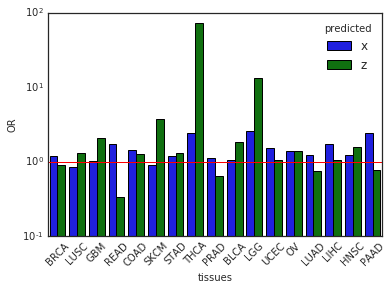

In [6]:
g = sns.barplot(x='tissues', y='OR', hue='predicted', data=df)
plt.axhline(y=1, color='r', linestyle='-')
g.figure.get_axes()[0].set_yscale('log')
plt.xticks(rotation=45)

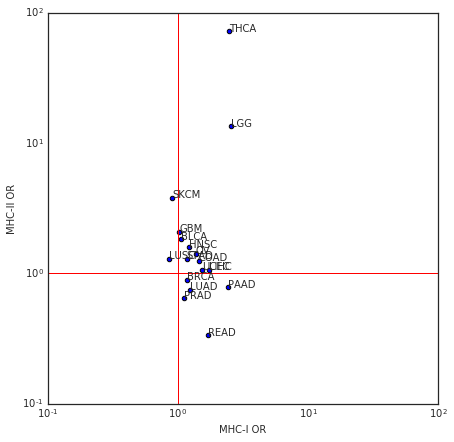

In [7]:
plt.figure(figsize=(7, 7))

g = plt.scatter(df[df.predicted == 'x'].OR, df[df.predicted == 'z'].OR)
g.figure.get_axes()[0].set_yscale('log')
g.figure.get_axes()[0].set_xscale('log')

plt.ylim(0.1, 100)
plt.xlim(0.1, 100)

plt.axhline(y=1, color='r', linestyle='-')
plt.axvline(x=1, color='r', linestyle='-')

for i, txt in enumerate(df[df.predicted == 'x'].tissues):
    plt.annotate(txt, (list(df[df.predicted == 'x'].OR)[i], list(df[df.predicted == 'z'].OR)[i]), size=10)

plt.xlabel('MHC-I OR')
plt.ylabel('MHC-II OR')

Pan

In [6]:
cancer = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/OR/Both.pan.thresh_2.cancer.txt',
           sep=' ')
cancer['mutation_type'] = 'cancer'
passenger = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/OR/Both.pan.thresh_0.germline.txt',
           sep=' ')
passenger['mutation_type'] = 'passenger'
germline = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/OR/Both.pan.thresh_0.passenger.txt',
           sep=' ')
germline['mutation_type'] = 'germline'

In [8]:
df = pd.concat([cancer, passenger, germline])

In [9]:
df

,OR,CI_low,CI_high,predicted,mutation_type
1,1.426243,1.413139,1.439468,x,cancer
2,2.117561,2.104526,2.130677,z,cancer
1,1.085331,1.085663,1.084999,x,passenger
2,0.952076,0.954005,0.950152,z,passenger
1,1.015903,1.007093,1.024790,x,germline
2,1.023697,1.012074,1.035453,z,germline


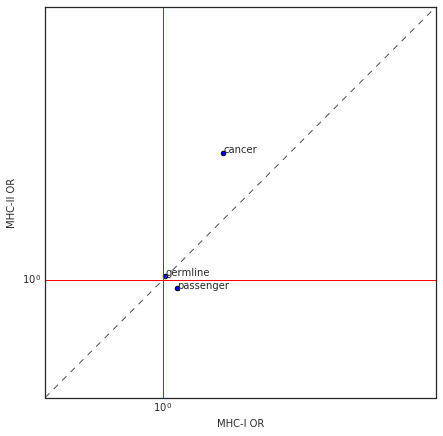

In [22]:
f, ax = plt.subplots(figsize=(7, 7))
ax.plot([0.5, 5], [0.5, 5], ls="--", c=".3")

g = plt.scatter(df[df.predicted == 'x'].OR, df[df.predicted == 'z'].OR)

g.figure.get_axes()[0].set_yscale('log')
g.figure.get_axes()[0].set_xscale('log')

plt.ylim(0.5, 5)
plt.xlim(0.5, 5)


plt.axhline(y=1, color='r', linestyle='-')
plt.axvline(x=1, color='r', linestyle='-')

for i, txt in enumerate(df[df.predicted == 'x'].mutation_type):
    plt.annotate(txt, (list(df[df.predicted == 'x'].OR)[i], list(df[df.predicted == 'z'].OR)[i]), size=10)

plt.xlabel('MHC-I OR')
plt.ylabel('MHC-II OR')